In [26]:
import requests
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math

In [2]:
API_ENDPOINT_URL =  'http://lauzhack.sqpub.ch/histo_prices'

r = requests.get(API_ENDPOINT_URL)

In [3]:
raw_data = r.text.split('\n')

In [22]:
data_series = pd.Series(raw_data)
data_series = data_series.str.split(' ')

data = pd.DataFrame(data_series.values.tolist(), index=data_series.index)
data.columns = ['timestamp', 'price']
data['timestamp'] = pd.to_datetime(data.timestamp)
data.set_index('timestamp', inplace=True)
data['price'] = data['price'].astype(float)

In [58]:
mean_minute = data.groupby(pd.Grouper(freq='60s')).mean()[2881:].dropna()

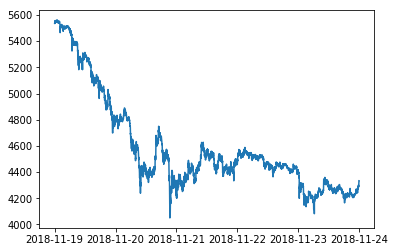

In [57]:
plt.plot(mean_minute)